In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import powerlaw
from itertools import islice
import seaborn as sns

In [2]:
# Load and view the file
file_path = "BIOGRID-ORGANISM-Homo_sapiens-4.4.218.tab3.txt"

df = pd.read_csv(file_path, sep="\t", comment="#", header=None, usecols=[7, 8], names=["Interactor_A", "Interactor_B"], low_memory=False)

df.dropna(inplace=True)

print(df.head())

  Interactor_A Interactor_B
0       MAP2K4         FLNC
1         MYPN        ACTN2
2        ACVR1         FNTA
3        GATA2          PML
4         RPA2        STAT3


In [3]:
#Question-1 :  For each node compute the degree and identify top 10 hub nodes.

G = nx.Graph()

G.add_edges_from(df.values)

print(f"Total Nodes: {G.number_of_nodes()}")
print(f"Total Edges: {G.number_of_edges()}")

degree_dict = dict(G.degree())

top_10_hub_nodes = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 Hub Nodes by Degree:")
for node, degree in top_10_hub_nodes:
    print(f"{node}: {degree}")

Total Nodes: 26771
Total Edges: 856635

Top 10 Hub Nodes by Degree:
ZRANB1: 4160
PARK2: 3426
EGFR: 3070
PLEKHA4: 2971
KIAA1429: 2932
KRAS: 2891
MYC: 2817
CCNF: 2798
CUL3: 2656
TRIM25: 2497


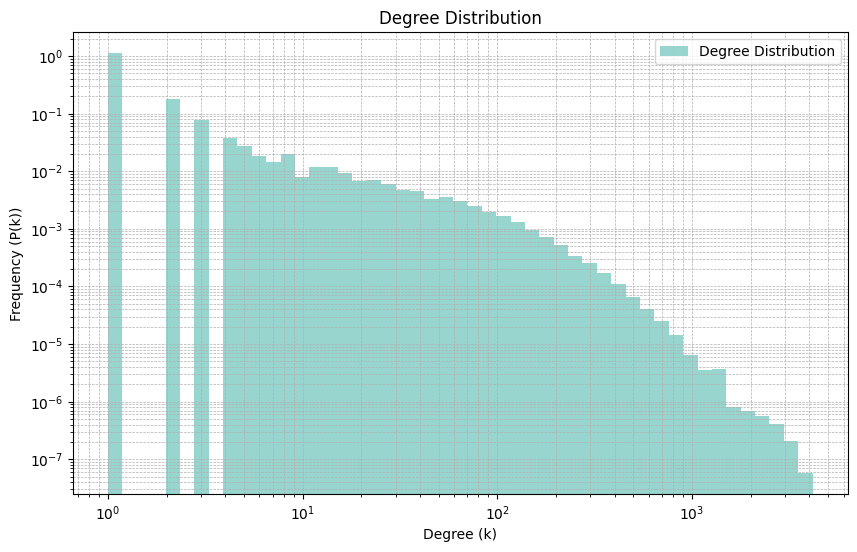

In [4]:
# Question -2 : Draw the graph of degree distribution to see if it is a scale free network or not

degree_values = np.array(list(degree_dict.values()))

degree_values = degree_values[degree_values > 0]


plt.figure(figsize=(10, 6))
plt.hist(degree_values, bins=np.logspace(np.log10(1), np.log10(max(degree_values)), 50), 
         color='#76c7c0', alpha=0.75, density=True, label='Degree Distribution')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Degree (k)')
plt.ylabel('Frequency (P(k))')
plt.title('Degree Distribution')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()

Computing shortest path lengths in chunks of 500...
Total shortest path lengths computed: 716525827


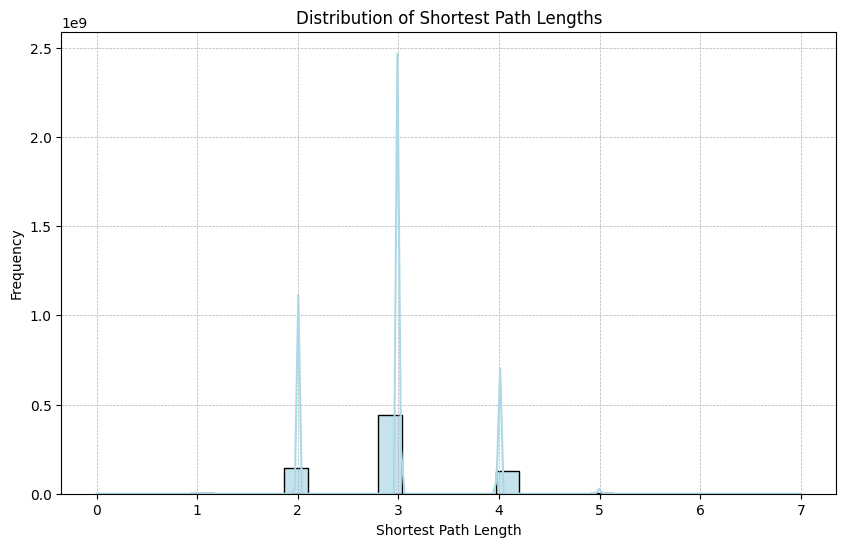

In [9]:
# Question-3: Compute the shortest path for all node pairs and plot the distribution of shortest path length

def chunks(data, size):
    """Yield successive chunks of data."""
    it = iter(data)
    for _ in range(0, len(data), size):
        yield list(islice(it, size))

def compute_and_plot_shortest_path_distribution_in_chunks(graph, chunk_size=500):
    """
    Compute shortest path lengths for all node pairs in chunks and 
    plot their distribution.
    """
    print(f"Computing shortest path lengths in chunks of {chunk_size}...")

    all_path_lengths = []
    
    nodes = list(graph.nodes())
    node_chunks = list(chunks(nodes, chunk_size))


    for idx, chunk in enumerate(node_chunks):
        #print(f"Processing chunk {idx + 1}/{len(node_chunks)} with {len(chunk)} nodes...")
        

        for node in chunk:
            try:
                paths = nx.single_source_shortest_path_length(graph, node)
                all_path_lengths.extend(paths.values())
            except Exception as e:
                print(f"Error processing node {node}: {e}")
                continue

    print(f"Total shortest path lengths computed: {len(all_path_lengths)}")

    plt.figure(figsize=(10, 6))
    sns.histplot(all_path_lengths, bins=30, kde=True, color="lightblue", alpha=0.7)
    plt.xlabel("Shortest Path Length")
    plt.ylabel("Frequency")
    plt.title("Distribution of Shortest Path Lengths")
    plt.grid(True, linestyle="--", linewidth=0.5)
    plt.savefig("shortest_path_distribution_chunks.pdf")  
    plt.show()

compute_and_plot_shortest_path_distribution_in_chunks(G, chunk_size=500)

In [5]:
# Question-4: Compute betweenness and closeness, identify top 10 nodes

print("\nComputing betweenness centrality...")
betweenness = nx.betweenness_centrality(G, k=500, seed=42)
top_10_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 Nodes by Betweenness Centrality:")
for node, bc in top_10_betweenness:
    print(f"{node}: {bc:.6f}")

print("\nComputing closeness centrality...")
def compute_harmonic_closeness(graph, chunk_size=500):
    N = graph.number_of_nodes()
    harmonic_closeness = {}
    nodes = list(graph.nodes())
    for i in range(0, len(nodes), chunk_size):
        chunk = nodes[i:i+chunk_size]
        for node in chunk:
            try:
                dists = nx.single_source_shortest_path_length(graph, node)
                total = 0.0
                for d in dists.values():
                    if d > 0: 
                        total += 1.0 / d
                
                harmonic_closeness[node] = total / (N - 1)
            except Exception as e:
                print(f"Error processing node {node}: {e}")
                harmonic_closeness[node] = 0.0
    return harmonic_closeness

harmonic_closeness = compute_harmonic_closeness(G, chunk_size=500)
top_10_closeness = sorted(harmonic_closeness.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 Nodes by Harmonic Closeness Centrality:")
for node, hc in top_10_closeness:
    print(f"{node}: {hc:.6f}")


Computing betweenness centrality...

Top 10 Nodes by Betweenness Centrality:
UBC: 0.045594
NR3C1: 0.036977
CCNF: 0.036762
APP: 0.029426
KIAA1429: 0.028654
TRIM25: 0.027188
PARK2: 0.024566
ZRANB1: 0.023217
TP53: 0.022526
EGFR: 0.022525

Computing closeness centrality...

Top 10 Nodes by Harmonic Closeness Centrality:
ZRANB1: 0.549418
PARK2: 0.536138
EGFR: 0.529757
PLEKHA4: 0.524511
KIAA1429: 0.522796
CUL3: 0.520676
MYC: 0.516455
CCNF: 0.515839
HSPA8: 0.514877
TP53: 0.514198
